# Урок 3. TensorFlow

## Практическое задание
<ol>
    <li>1. Попробуйте улучшить работу нейронной сети(разобранную на уроке) обучавшейся на датасет Fashion-MNIST. 
       Опишите в комментарии к уроку - какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?<br><br>
    </li>
    
    <li>2. Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow неразобранные на уроке.</li>
        
    <li>*3. Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность? </li>   
    
</ol>

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

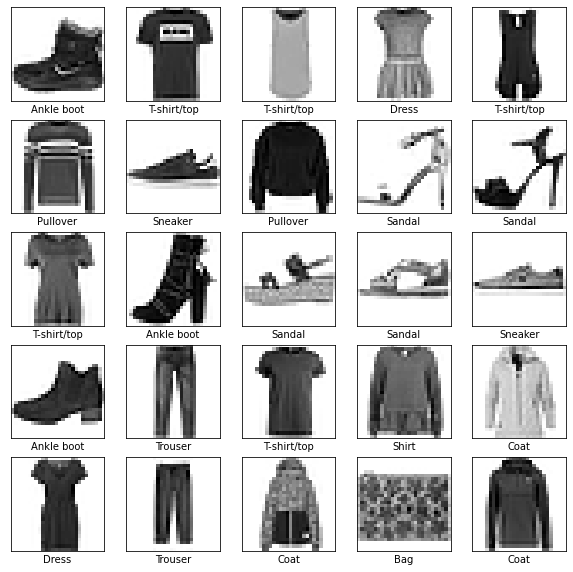

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Построение модели

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 1s 555us/step - loss: 0.4963 - accuracy: 0.8239
Epoch 2/3
1875/1875 [==============================] - 1s 539us/step - loss: 0.3702 - accuracy: 0.8645
Epoch 3/3
1875/1875 [==============================] - 1s 532us/step - loss: 0.3340 - accuracy: 0.8770


In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3771 - accuracy: 0.8635

Test accuracy: 0.8634999990463257


In [34]:
%%time
acc = []

for o in ['Adam', 'Adamax', 'RMSprop', 'SGD']: # оптимизаторы
    for e in [5, 10, 15]: # эпохи
        for n in [32, 64, 128, 256]: # нейроны
            for l in [1, 3, 5]: # слои
                layers = [keras.layers.Flatten(input_shape=(28, 28))]
                for i in range(l): 
                    layers.append(keras.layers.Dense(n, activation='relu'))
                layers.append(keras.layers.Dense(10))
                model = keras.Sequential(layers)

                model.compile(optimizer=o,
                              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                              metrics=['accuracy'])
                model.fit(train_images, train_labels, epochs=e)
                _, test_acc = model.evaluate(test_images, test_labels, verbose=2)

                acc.append([test_acc, n, l, e, o])
                print(f'Test accuracy (N={n}, L={l}, E={e}, Opt={o}):{test_acc}')

best = sorted(acc, reverse=True)[0]
print(f'Best (N={best[1]}, L={best[2]}, E={best[3]}, Opt={best[4]}) = {best[0]}')

Epoch 1/5
1875/1875 [==============================] - 1s 434us/step - loss: 0.5494 - accuracy: 0.8120
Epoch 2/5
1875/1875 [==============================] - 1s 433us/step - loss: 0.4123 - accuracy: 0.8545
Epoch 3/5
1875/1875 [==============================] - 1s 431us/step - loss: 0.3789 - accuracy: 0.8644
Epoch 4/5
1875/1875 [==============================] - 1s 432us/step - loss: 0.3569 - accuracy: 0.8720
Epoch 5/5
1875/1875 [==============================] - 1s 436us/step - loss: 0.3448 - accuracy: 0.8762
313/313 - 0s - loss: 0.3990 - accuracy: 0.8571
Test accuracy (N=32, L=1, E=5, Opt=Adam):0.8571000099182129
Epoch 1/5
1875/1875 [==============================] - 1s 469us/step - loss: 0.5671 - accuracy: 0.7998
Epoch 2/5
1875/1875 [==============================] - 1s 470us/step - loss: 0.4053 - accuracy: 0.8543
Epoch 3/5
1875/1875 [==============================] - 1s 470us/step - loss: 0.3725 - accuracy: 0.8651
Epoch 4/5
1875/1875 [==============================] - 1s 469us/step 

1875/1875 [==============================] - 1s 433us/step - loss: 0.3180 - accuracy: 0.8855
Epoch 9/10
1875/1875 [==============================] - 1s 428us/step - loss: 0.3112 - accuracy: 0.8860
Epoch 10/10
1875/1875 [==============================] - 1s 425us/step - loss: 0.3051 - accuracy: 0.8893
313/313 - 0s - loss: 0.3958 - accuracy: 0.8576
Test accuracy (N=32, L=1, E=10, Opt=Adam):0.8575999736785889
Epoch 1/10
1875/1875 [==============================] - 1s 477us/step - loss: 0.5614 - accuracy: 0.8025
Epoch 2/10
1875/1875 [==============================] - 1s 474us/step - loss: 0.4074 - accuracy: 0.8549
Epoch 3/10
1875/1875 [==============================] - 1s 480us/step - loss: 0.3697 - accuracy: 0.8654
Epoch 4/10
1875/1875 [==============================] - 1s 478us/step - loss: 0.3462 - accuracy: 0.8740
Epoch 5/10
1875/1875 [==============================] - 1s 476us/step - loss: 0.3288 - accuracy: 0.8792
Epoch 6/10
1875/1875 [==============================] - 1s 475us/step 

1875/1875 [==============================] - 1s 642us/step - loss: 0.2650 - accuracy: 0.8986
Epoch 8/10
1875/1875 [==============================] - 1s 642us/step - loss: 0.2544 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 1s 637us/step - loss: 0.2448 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 1s 639us/step - loss: 0.2334 - accuracy: 0.9121
313/313 - 0s - loss: 0.3339 - accuracy: 0.8866
Test accuracy (N=128, L=3, E=10, Opt=Adam):0.8866000175476074
Epoch 1/10
1875/1875 [==============================] - 1s 774us/step - loss: 0.5121 - accuracy: 0.8141
Epoch 2/10
1875/1875 [==============================] - 1s 772us/step - loss: 0.3751 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 1s 777us/step - loss: 0.3424 - accuracy: 0.8750
Epoch 4/10
1875/1875 [==============================] - 1s 772us/step - loss: 0.3214 - accuracy: 0.8816
Epoch 5/10
1875/1875 [==============================] - 1s 773us/step

1875/1875 [==============================] - 1s 477us/step - loss: 0.2778 - accuracy: 0.8962
Epoch 13/15
1875/1875 [==============================] - 1s 475us/step - loss: 0.2721 - accuracy: 0.8991
Epoch 14/15
1875/1875 [==============================] - 1s 476us/step - loss: 0.2680 - accuracy: 0.9004
Epoch 15/15
1875/1875 [==============================] - 1s 484us/step - loss: 0.2620 - accuracy: 0.9017
313/313 - 0s - loss: 0.4065 - accuracy: 0.8660
Test accuracy (N=32, L=3, E=15, Opt=Adam):0.8659999966621399
Epoch 1/15
1875/1875 [==============================] - 1s 516us/step - loss: 0.5793 - accuracy: 0.7906
Epoch 2/15
1875/1875 [==============================] - 1s 510us/step - loss: 0.4110 - accuracy: 0.8517
Epoch 3/15
1875/1875 [==============================] - 1s 509us/step - loss: 0.3752 - accuracy: 0.8625
Epoch 4/15
1875/1875 [==============================] - 1s 509us/step - loss: 0.3555 - accuracy: 0.8701
Epoch 5/15
1875/1875 [==============================] - 1s 509us/ste

1875/1875 [==============================] - 1s 493us/step - loss: 0.2699 - accuracy: 0.9001
Epoch 8/15
1875/1875 [==============================] - 1s 493us/step - loss: 0.2576 - accuracy: 0.9051
Epoch 9/15
1875/1875 [==============================] - 1s 495us/step - loss: 0.2485 - accuracy: 0.9083
Epoch 10/15
1875/1875 [==============================] - 1s 504us/step - loss: 0.2404 - accuracy: 0.9104
Epoch 11/15
1875/1875 [==============================] - 1s 494us/step - loss: 0.2342 - accuracy: 0.9127
Epoch 12/15
1875/1875 [==============================] - 1s 493us/step - loss: 0.2262 - accuracy: 0.9168
Epoch 13/15
1875/1875 [==============================] - 1s 494us/step - loss: 0.2177 - accuracy: 0.9183
Epoch 14/15
1875/1875 [==============================] - 1s 492us/step - loss: 0.2116 - accuracy: 0.9225
Epoch 15/15
1875/1875 [==============================] - 1s 494us/step - loss: 0.2077 - accuracy: 0.9220
313/313 - 0s - loss: 0.3384 - accuracy: 0.8864
Test accuracy (N=128, 

1875/1875 [==============================] - 2s 1ms/step - loss: 0.3040 - accuracy: 0.8889
Epoch 6/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2923 - accuracy: 0.8931
Epoch 7/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2751 - accuracy: 0.8980
Epoch 8/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2692 - accuracy: 0.9003
Epoch 9/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2562 - accuracy: 0.9036
Epoch 10/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2474 - accuracy: 0.9071
Epoch 11/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2409 - accuracy: 0.9107
Epoch 12/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2337 - accuracy: 0.9122
Epoch 13/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2292 - accuracy: 0.9142
Epoch 14/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2209 - acc

Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3674 - accuracy: 0.8655
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3259 - accuracy: 0.8795
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2987 - accuracy: 0.8881
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2791 - accuracy: 0.8959
313/313 - 0s - loss: 0.3290 - accuracy: 0.8795
Test accuracy (N=256, L=5, E=5, Opt=Adamax):0.8794999718666077
Epoch 1/10
1875/1875 [==============================] - 1s 482us/step - loss: 0.6458 - accuracy: 0.7874
Epoch 2/10
1875/1875 [==============================] - 1s 476us/step - loss: 0.4594 - accuracy: 0.8431
Epoch 3/10
1875/1875 [==============================] - 1s 456us/step - loss: 0.4218 - accuracy: 0.8547
Epoch 4/10
1875/1875 [==============================] - 1s 481us/step - loss: 0.3990 - accuracy: 0.8619
Epoch 5/10
1875/1875 [==============================] - 1s 484us/step 

1875/1875 [==============================] - 1s 516us/step - loss: 0.3577 - accuracy: 0.8738
Epoch 5/10
1875/1875 [==============================] - 1s 519us/step - loss: 0.3416 - accuracy: 0.8786
Epoch 6/10
1875/1875 [==============================] - 1s 517us/step - loss: 0.3268 - accuracy: 0.8831
Epoch 7/10
1875/1875 [==============================] - 1s 512us/step - loss: 0.3155 - accuracy: 0.8868
Epoch 8/10
1875/1875 [==============================] - 1s 515us/step - loss: 0.3044 - accuracy: 0.8908
Epoch 9/10
1875/1875 [==============================] - 1s 516us/step - loss: 0.2957 - accuracy: 0.8936
Epoch 10/10
1875/1875 [==============================] - 1s 515us/step - loss: 0.2878 - accuracy: 0.8956
313/313 - 0s - loss: 0.3671 - accuracy: 0.8671
Test accuracy (N=128, L=1, E=10, Opt=Adamax):0.8671000003814697
Epoch 1/10
1875/1875 [==============================] - 1s 640us/step - loss: 0.5251 - accuracy: 0.8150
Epoch 2/10
1875/1875 [==============================] - 1s 637us/st

1875/1875 [==============================] - 1s 527us/step - loss: 0.6486 - accuracy: 0.7804
Epoch 2/15
1875/1875 [==============================] - 1s 519us/step - loss: 0.4475 - accuracy: 0.8426
Epoch 3/15
1875/1875 [==============================] - 1s 519us/step - loss: 0.4092 - accuracy: 0.8555
Epoch 4/15
1875/1875 [==============================] - 1s 545us/step - loss: 0.3852 - accuracy: 0.8624
Epoch 5/15
1875/1875 [==============================] - 1s 533us/step - loss: 0.3692 - accuracy: 0.8685
Epoch 6/15
1875/1875 [==============================] - 1s 545us/step - loss: 0.3555 - accuracy: 0.8724
Epoch 7/15
1875/1875 [==============================] - 1s 501us/step - loss: 0.3448 - accuracy: 0.8755
Epoch 8/15
1875/1875 [==============================] - 1s 524us/step - loss: 0.3353 - accuracy: 0.8793
Epoch 9/15
1875/1875 [==============================] - 1s 511us/step - loss: 0.3271 - accuracy: 0.8816
Epoch 10/15
1875/1875 [==============================] - 1s 493us/step - lo

1875/1875 [==============================] - 1s 566us/step - loss: 0.2684 - accuracy: 0.9003
Epoch 13/15
1875/1875 [==============================] - 1s 570us/step - loss: 0.2614 - accuracy: 0.9022
Epoch 14/15
1875/1875 [==============================] - 1s 568us/step - loss: 0.2560 - accuracy: 0.9048
Epoch 15/15
1875/1875 [==============================] - 1s 567us/step - loss: 0.2504 - accuracy: 0.9069
313/313 - 0s - loss: 0.3345 - accuracy: 0.8811
Test accuracy (N=64, L=5, E=15, Opt=Adamax):0.8810999989509583
Epoch 1/15
1875/1875 [==============================] - 1s 520us/step - loss: 0.5504 - accuracy: 0.8144
Epoch 2/15
1875/1875 [==============================] - 1s 517us/step - loss: 0.4249 - accuracy: 0.8516
Epoch 3/15
1875/1875 [==============================] - 1s 521us/step - loss: 0.3894 - accuracy: 0.8628
Epoch 4/15
1875/1875 [==============================] - 1s 516us/step - loss: 0.3666 - accuracy: 0.8703
Epoch 5/15
1875/1875 [==============================] - 1s 516us/s

1875/1875 [==============================] - 2s 899us/step - loss: 0.2482 - accuracy: 0.9075
Epoch 8/15
1875/1875 [==============================] - 2s 900us/step - loss: 0.2368 - accuracy: 0.9114
Epoch 9/15
1875/1875 [==============================] - 2s 923us/step - loss: 0.2248 - accuracy: 0.9154
Epoch 10/15
1875/1875 [==============================] - 2s 914us/step - loss: 0.2139 - accuracy: 0.9183
Epoch 11/15
1875/1875 [==============================] - 2s 903us/step - loss: 0.2052 - accuracy: 0.9227
Epoch 12/15
1875/1875 [==============================] - 2s 901us/step - loss: 0.1956 - accuracy: 0.9264
Epoch 13/15
1875/1875 [==============================] - 2s 900us/step - loss: 0.1867 - accuracy: 0.9295
Epoch 14/15
1875/1875 [==============================] - 2s 904us/step - loss: 0.1796 - accuracy: 0.9322
Epoch 15/15
1875/1875 [==============================] - 2s 900us/step - loss: 0.1722 - accuracy: 0.9346
313/313 - 0s - loss: 0.3405 - accuracy: 0.8898
Test accuracy (N=256, 

1875/1875 [==============================] - 2s 861us/step - loss: 0.4109 - accuracy: 0.8549
Epoch 3/5
1875/1875 [==============================] - 2s 864us/step - loss: 0.4114 - accuracy: 0.8588
Epoch 4/5
1875/1875 [==============================] - 2s 858us/step - loss: 0.4136 - accuracy: 0.8633
Epoch 5/5
1875/1875 [==============================] - 2s 860us/step - loss: 0.4125 - accuracy: 0.8641
313/313 - 0s - loss: 0.4922 - accuracy: 0.8571
Test accuracy (N=128, L=5, E=5, Opt=RMSprop):0.8571000099182129
Epoch 1/5
1875/1875 [==============================] - 1s 739us/step - loss: 0.4908 - accuracy: 0.8269
Epoch 2/5
1875/1875 [==============================] - 1s 733us/step - loss: 0.3731 - accuracy: 0.8676
Epoch 3/5
1875/1875 [==============================] - 1s 740us/step - loss: 0.3460 - accuracy: 0.8779
Epoch 4/5
1875/1875 [==============================] - 1s 743us/step - loss: 0.3317 - accuracy: 0.8855
Epoch 5/5
1875/1875 [==============================] - 1s 737us/step - loss

1875/1875 [==============================] - 1s 534us/step - loss: 0.3451 - accuracy: 0.8803
Epoch 9/10
1875/1875 [==============================] - 1s 533us/step - loss: 0.3477 - accuracy: 0.8811
Epoch 10/10
1875/1875 [==============================] - 1s 534us/step - loss: 0.3452 - accuracy: 0.8835
313/313 - 0s - loss: 0.4793 - accuracy: 0.8576
Test accuracy (N=64, L=3, E=10, Opt=RMSprop):0.8575999736785889
Epoch 1/10
1875/1875 [==============================] - 1s 594us/step - loss: 0.5503 - accuracy: 0.7962
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 0.4074 - accuracy: 0.85 - 1s 583us/step - loss: 0.4072 - accuracy: 0.8528
Epoch 3/10
1875/1875 [==============================] - 1s 582us/step - loss: 0.3790 - accuracy: 0.8664
Epoch 4/10
1875/1875 [==============================] - 1s 595us/step - loss: 0.3766 - accuracy: 0.8684
Epoch 5/10
1875/1875 [==============================] - 1s 589us/step - loss: 0.3761 - accuracy: 0.8713
Epoch 6/10
1875/1875 [===

1875/1875 [==============================] - 3s 1ms/step - loss: 0.4441 - accuracy: 0.8692
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4583 - accuracy: 0.8680
313/313 - 0s - loss: 0.5565 - accuracy: 0.8318
Test accuracy (N=256, L=5, E=10, Opt=RMSprop):0.8317999839782715
Epoch 1/15
1875/1875 [==============================] - 1s 490us/step - loss: 0.5632 - accuracy: 0.8077
Epoch 2/15
1875/1875 [==============================] - 1s 490us/step - loss: 0.4227 - accuracy: 0.8514
Epoch 3/15
1875/1875 [==============================] - 1s 476us/step - loss: 0.3879 - accuracy: 0.8610
Epoch 4/15
1875/1875 [==============================] - 1s 492us/step - loss: 0.3678 - accuracy: 0.8689
Epoch 5/15
1875/1875 [==============================] - 1s 498us/step - loss: 0.3554 - accuracy: 0.8734
Epoch 6/15
1875/1875 [==============================] - 1s 491us/step - loss: 0.3452 - accuracy: 0.8770
Epoch 7/15
1875/1875 [==============================] - 1s 497us/step 

1875/1875 [==============================] - 1s 534us/step - loss: 0.3357 - accuracy: 0.8847
Epoch 10/15
1875/1875 [==============================] - 1s 533us/step - loss: 0.3340 - accuracy: 0.8844
Epoch 11/15
1875/1875 [==============================] - 1s 537us/step - loss: 0.3333 - accuracy: 0.8863
Epoch 12/15
1875/1875 [==============================] - 1s 533us/step - loss: 0.3345 - accuracy: 0.8844
Epoch 13/15
1875/1875 [==============================] - 1s 542us/step - loss: 0.3389 - accuracy: 0.8863
Epoch 14/15
1875/1875 [==============================] - 1s 539us/step - loss: 0.3377 - accuracy: 0.8868
Epoch 15/15
1875/1875 [==============================] - 1s 537us/step - loss: 0.3366 - accuracy: 0.8872
313/313 - 0s - loss: 0.4731 - accuracy: 0.8720
Test accuracy (N=64, L=3, E=15, Opt=RMSprop):0.871999979019165
Epoch 1/15
1875/1875 [==============================] - 1s 606us/step - loss: 0.5460 - accuracy: 0.8016
Epoch 2/15
1875/1875 [==============================] - 1s 583u

1875/1875 [==============================] - 1s 746us/step - loss: 0.3043 - accuracy: 0.8956
Epoch 8/15
1875/1875 [==============================] - 1s 746us/step - loss: 0.3006 - accuracy: 0.8985
Epoch 9/15
1875/1875 [==============================] - 1s 748us/step - loss: 0.2915 - accuracy: 0.9027
Epoch 10/15
1875/1875 [==============================] - 1s 756us/step - loss: 0.2843 - accuracy: 0.9055
Epoch 11/15
1875/1875 [==============================] - 1s 764us/step - loss: 0.2802 - accuracy: 0.9078
Epoch 12/15
1875/1875 [==============================] - 1s 746us/step - loss: 0.2770 - accuracy: 0.9096
Epoch 13/15
1875/1875 [==============================] - 1s 749us/step - loss: 0.2677 - accuracy: 0.9115
Epoch 14/15
1875/1875 [==============================] - 1s 745us/step - loss: 0.2661 - accuracy: 0.9135
Epoch 15/15
1875/1875 [==============================] - 1s 754us/step - loss: 0.2596 - accuracy: 0.9156
313/313 - 0s - loss: 0.5743 - accuracy: 0.8751
Test accuracy (N=256, 

1875/1875 [==============================] - 1s 472us/step - loss: 0.5157 - accuracy: 0.8250
Epoch 3/5
1875/1875 [==============================] - 1s 472us/step - loss: 0.4699 - accuracy: 0.8387
Epoch 4/5
1875/1875 [==============================] - 1s 473us/step - loss: 0.4450 - accuracy: 0.8465
Epoch 5/5
1875/1875 [==============================] - 1s 469us/step - loss: 0.4287 - accuracy: 0.8517
313/313 - 0s - loss: 0.4599 - accuracy: 0.8409
Test accuracy (N=128, L=1, E=5, Opt=SGD):0.8409000039100647
Epoch 1/5
1875/1875 [==============================] - 1s 574us/step - loss: 0.7415 - accuracy: 0.7472
Epoch 2/5
1875/1875 [==============================] - 1s 572us/step - loss: 0.4818 - accuracy: 0.8313
Epoch 3/5
1875/1875 [==============================] - 1s 572us/step - loss: 0.4346 - accuracy: 0.8479
Epoch 4/5
1875/1875 [==============================] - 1s 575us/step - loss: 0.4059 - accuracy: 0.8573
Epoch 5/5
1875/1875 [==============================] - 1s 572us/step - loss: 0.

1875/1875 [==============================] - 1s 415us/step - loss: 0.3986 - accuracy: 0.8632
Epoch 10/10
1875/1875 [==============================] - 1s 419us/step - loss: 0.3914 - accuracy: 0.8642
313/313 - 0s - loss: 0.4245 - accuracy: 0.8513
Test accuracy (N=64, L=1, E=10, Opt=SGD):0.8513000011444092
Epoch 1/10
1875/1875 [==============================] - 1s 467us/step - loss: 0.8239 - accuracy: 0.7230
Epoch 2/10
1875/1875 [==============================] - 1s 466us/step - loss: 0.5126 - accuracy: 0.8174
Epoch 3/10
1875/1875 [==============================] - 1s 467us/step - loss: 0.4584 - accuracy: 0.8369
Epoch 4/10
1875/1875 [==============================] - 1s 465us/step - loss: 0.4272 - accuracy: 0.8473
Epoch 5/10
1875/1875 [==============================] - 1s 467us/step - loss: 0.4045 - accuracy: 0.8551
Epoch 6/10
1875/1875 [==============================] - 1s 465us/step - loss: 0.3860 - accuracy: 0.8601
Epoch 7/10
1875/1875 [==============================] - 1s 465us/step -

1875/1875 [==============================] - 1s 781us/step - loss: 0.3084 - accuracy: 0.8874
313/313 - 0s - loss: 0.3652 - accuracy: 0.8696
Test accuracy (N=256, L=3, E=10, Opt=SGD):0.8695999979972839
Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7534 - accuracy: 0.7357
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4709 - accuracy: 0.8328
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4149 - accuracy: 0.8538
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3816 - accuracy: 0.8626
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3572 - accuracy: 0.8705
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3385 - accuracy: 0.8760
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3246 - accuracy: 0.8816
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3110 - 

1875/1875 [==============================] - 1s 460us/step - loss: 0.5042 - accuracy: 0.8227
Epoch 3/15
1875/1875 [==============================] - 1s 458us/step - loss: 0.4535 - accuracy: 0.8398
Epoch 4/15
1875/1875 [==============================] - 1s 477us/step - loss: 0.4244 - accuracy: 0.8490
Epoch 5/15
1875/1875 [==============================] - 1s 492us/step - loss: 0.4009 - accuracy: 0.8572
Epoch 6/15
1875/1875 [==============================] - 1s 460us/step - loss: 0.3844 - accuracy: 0.8614
Epoch 7/15
1875/1875 [==============================] - 1s 466us/step - loss: 0.3695 - accuracy: 0.8676
Epoch 8/15
1875/1875 [==============================] - 1s 465us/step - loss: 0.3569 - accuracy: 0.8714
Epoch 9/15
1875/1875 [==============================] - 1s 464us/step - loss: 0.3477 - accuracy: 0.8742
Epoch 10/15
1875/1875 [==============================] - 1s 462us/step - loss: 0.3391 - accuracy: 0.8782
Epoch 11/15
1875/1875 [==============================] - 1s 468us/step - l

1875/1875 [==============================] - 1s 516us/step - loss: 0.7285 - accuracy: 0.7656
Epoch 2/15
1875/1875 [==============================] - 1s 512us/step - loss: 0.5074 - accuracy: 0.8293
Epoch 3/15
1875/1875 [==============================] - 1s 513us/step - loss: 0.4636 - accuracy: 0.8413
Epoch 4/15
1875/1875 [==============================] - 1s 513us/step - loss: 0.4375 - accuracy: 0.8483
Epoch 5/15
1875/1875 [==============================] - 1s 518us/step - loss: 0.4188 - accuracy: 0.8545
Epoch 6/15
1875/1875 [==============================] - 1s 514us/step - loss: 0.4056 - accuracy: 0.8605
Epoch 7/15
1875/1875 [==============================] - 1s 514us/step - loss: 0.3936 - accuracy: 0.8638
Epoch 8/15
1875/1875 [==============================] - 1s 518us/step - loss: 0.3832 - accuracy: 0.8680
Epoch 9/15
1875/1875 [==============================] - 1s 529us/step - loss: 0.3738 - accuracy: 0.8708
Epoch 10/15
1875/1875 [==============================] - 1s 518us/step - lo

In [54]:
sorted(acc, reverse=True)

[[0.8932999968528748, 256, 5, 15, 'Adamax'],
 [0.8912000060081482, 256, 1, 15, 'Adamax'],
 [0.8912000060081482, 256, 1, 15, 'Adam'],
 [0.8902999758720398, 128, 3, 15, 'Adam'],
 [0.8898000121116638, 256, 3, 15, 'Adamax'],
 [0.8878999948501587, 256, 3, 15, 'Adam'],
 [0.8873999714851379, 128, 5, 15, 'Adamax'],
 [0.8873000144958496, 256, 1, 10, 'Adam'],
 [0.8871999979019165, 256, 3, 10, 'Adamax'],
 [0.8870000243186951, 256, 5, 10, 'Adamax'],
 [0.8866000175476074, 128, 3, 10, 'Adam'],
 [0.8863999843597412, 128, 1, 15, 'Adam'],
 [0.8862000107765198, 128, 3, 15, 'Adamax'],
 [0.8859999775886536, 64, 3, 15, 'Adam'],
 [0.8853999972343445, 256, 5, 15, 'Adam'],
 [0.885200023651123, 256, 3, 10, 'Adam'],
 [0.885200023651123, 128, 1, 10, 'Adam'],
 [0.8840000033378601, 256, 5, 10, 'Adam'],
 [0.8817999958992004, 128, 5, 10, 'Adamax'],
 [0.8816999793052673, 128, 1, 15, 'RMSprop'],
 [0.8810999989509583, 64, 5, 15, 'Adamax'],
 [0.8809000253677368, 128, 1, 10, 'RMSprop'],
 [0.8809000253677368, 64, 1, 15, '

### Выводы:
1. Наилучший результат с точностью 0.8932999968528748 был получен на 256 нейронах, 5 слоях, 15 эпохах, методе 'Adamax'.

2. Методы оптимизации Adam Adamax показали лучшие результаты среди остальных алгоритмов.
Как правило чем больше число нейронов, тем лучше результат, но до определённого предела, иначе можно переобучиться. 
Увеличение числа слоев на данном примере имело переменный успех, хотя по идее должно положительно сказываться на результате. Увеличение числа эпох приводит к улучшению результата, но снижению скорости.

3. Интересные команды TensorFlow: to_json, summary, save.